In [232]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from sklearn.metrics import confusion_matrix, rand_score, silhouette_score
from scipy.stats import poisson, norm
from sklearn.decomposition import PCA
import sys
sys.path.append("/home/camp/warnert")
sys.path.append("/home/camp/warnert/working/Recordings/binary_pulses/blip_manuscript")
import blip_analysis_manu as ba
import exp_blip_models_manu as em
import scipy.io as sio
import binary_recording as br
from mpl_toolkits.axes_grid1 import make_axes_locatable
import daskify
from scipy.stats import skewnorm, mannwhitneyu
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, OPTICS
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.gridspec import GridSpec
import openephys as oe
import os
from scipy.spatial import distance_matrix

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 8})
#matplotlib.rcParams['savefig.pad_inches'] = 0.1
from label_axes import label_axes


In [2]:
recs = ba.load_recs()

Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 1408 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 4608 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 4288 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 1440 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 5328 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 5328 trials in trial name file
Respiration peaks found
Found file

In [ ]:
for i in odour
ax.scatter(P[:,0], P[:,1], c=cm.Spectral(arange(n_odours*PCA_in.shape[2],)//PCA_in.shape[2]/n_odours), edgecolors='k', s=s)

In [3]:
unit_counts = [len(i.get_good_clusters()) for i in recs.recordings]

In [4]:
print(np.cumsum(unit_counts))

[ 10  31  41  63  86  92 118 145]


In [4]:
glyphs = []
for i in ba.get_trial_array():
    glyph_str = ''
    for j in i:
        if j == 1:
            glyph_str+='\u2593'
        else:
            glyph_str += '\u2591'



    glyphs.append(glyph_str)


In [5]:
def plot_mean_and_std(ax, data, color=None, xs=None):
    if xs is None:
        xs = np.arange(0, len(data))
    mean_data = np.mean(data, axis=-1)
    std_data = np.std(data, axis=-1)
    ax.plot(xs, mean_data)
    ax.fill


In [104]:
def set_global_ylim(axs):
    ymin = np.min([i.get_ylim()[0] for i in axs])
    ymax = np.max([i.get_ylim()[1] for i in axs])
    [i.set_ylim((ymin, ymax)) for i in axs]

In [6]:
units_usrt1 = ba.get_usrts(1, pre_trial_window=0.5, post_trial_window=0.5)
units_usrt2 = ba.get_usrts(3, pre_trial_window=0.5, post_trial_window=0.5)
units_usrt3 = ba.get_usrts(5, pre_trial_window=0.5, post_trial_window=0.5)

/home/camp/warnert/neurolytics/joined_recording.py:79: UserWarning: Mismatch in repeat lengths, cannot make full numpy array
  warnings.warn('Mismatch in repeat lengths, cannot make full numpy array')


In [7]:
mean_usrt1 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt1])
mean_usrt2 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt2])
mean_usrt3 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt3])

In [8]:
select_trials = [31, 30, 28, 24, 16, 8, 4, 2, 1, 0]


In [200]:
print(np.cumsum([len(np.where(axs1[-1]['leaves'] == i)[0]) for i in range(3)]))

[0 0 0]


(145, 870)


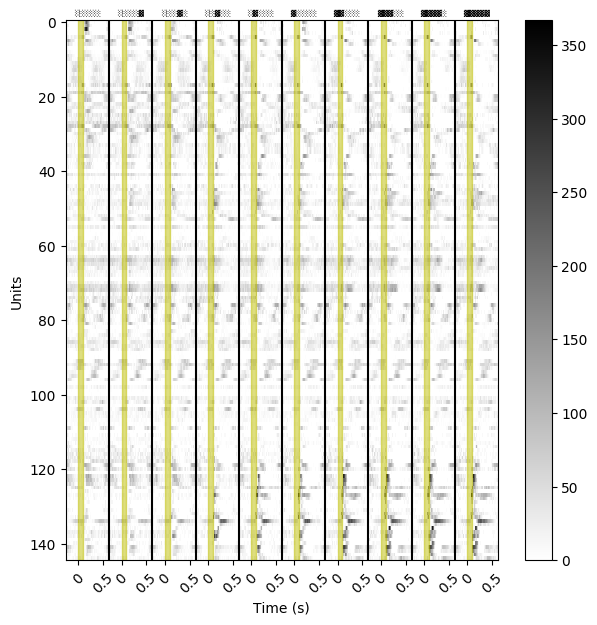

In [42]:
fig = plt.figure(figsize=(6, 6), dpi=100)
gs = GridSpec(1, 1, left=0.05, right=0.95, top=0.95, bottom=0.05)
ax = fig.add_subplot(gs[0])
#sorted_args = np.argsort(np.argmax(mean_usrt1[:, select_trials[::-1][-1]], axis=-1))
sorted_args = axs1[-1]['leaves'][::-1]
im = ax.imshow(mean_usrt1[sorted_args][:, select_trials[::-1], 25:].reshape(145, -1), cmap='binary', aspect='auto')
ax.axvspan(25, 35, color='y', alpha=0.5)
for i in range(1, 10):
    ax.axvline(87*i, color='k')
    ax.axvspan(25+87*i, 35+87*i, color='y', alpha=0.5)
    ax.text(17+87*i, -2, glyphs[select_trials[::-1][i]], fontsize=5)
plt.colorbar(ax=ax, mappable=im)
ax.text(17, -2, glyphs[select_trials[-1]], fontsize=5)
print(mean_usrt1[sorted_args][:, select_trials[::-1], 25:].reshape(145, -1).shape)
x_base = [25, 75]
xs = np.concatenate([np.array(x_base) + 87*i for i in range(10)])
labels = [0, 0.5] * 10
ax.set_xticks(xs)
ax.set_xticklabels(labels, rotation=45);
ax.set_ylabel('Units')
ax.set_xlabel('Time (s)')
plt.savefig('../../Thesis/Corrections/230209_all_units_select_trial_heatmap.pdf', bbox_inches='tight')

In [202]:
reshaped_im = mean_usrt1[sorted_args][:, select_trials[::-1], 25:]
print(reshaped_im.shape)

(145, 10, 87)


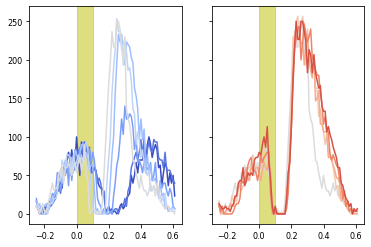

In [229]:
ui = -11
plt.figure(figsize=())
fig, ax = plt.subplots(1, 2, sharey=True)
xs = np.arange(-.25, .62, 1/100)
for i in range(6):
    ax[0].plot(xs, reshaped_im[ui, i], color=matplotlib.cm.coolwarm(i/10))
for i in range(5, 10):
    ax[1].plot(xs, reshaped_im[ui, i], color=matplotlib.cm.coolwarm(i/10))
ax[0].axvspan(0, 0.1, color='y', alpha=0.5)
ax[1].axvspan(0, 0.1, color='y', alpha=0.5)

In [4]:
def plot_psth(fig, gs, usrt, selected_trials, ui, xs, cmap='RdYlGn', resp=None):
    mean_usrt = [np.mean(i, axis=0) for i in usrt[ui]]
    std_usrt = [np.std(i, axis=0) for i in usrt[ui]]
    if resp is None:
        sub_gridspec = gs.subgridspec(ncols=1, nrows=2, hspace=.1)
        ax1 = fig.add_subplot(sub_gridspec[0])
        ax2 = fig.add_subplot(sub_gridspec[1])
    else:
        sub_gridspec = gs.subgridspec(ncols=1, nrows=5, hspace=.1)
        resp_ax = fig.add_subplot(sub_gridspec[0])
        ax1 = fig.add_subplot(sub_gridspec[1:3])
        ax2 = fig.add_subplot(sub_gridspec[3:5])
        xs_resp = np.arange(-.5, .62, 1/30000)
        resp_ax.plot(xs_resp, resp, color='k')
        resp_ax.axvspan(0, 0.1, color='lightgray')
        resp_ax.set_yticks([])
        resp_ax.spines['top'].set_visible(False)
        resp_ax.spines['right'].set_visible(False)
        resp_ax.spines['left'].set_visible(False)
        resp_ax.set_xticklabels([])
    selected_trials = selected_trials[::-1]

    count = 0
    ax1.plot(xs, mean_usrt[0], color='k', linestyle='--')
    ax2.plot(xs, mean_usrt[0], color='k', linestyle='--')
    for index, i in enumerate(selected_trials[1:6]):
        ax1.plot(xs, mean_usrt[i], color=matplotlib.cm.get_cmap(cmap)(index/(len(selected_trials)-1)))
        count += 1
    count -= 1
    for index, i in enumerate(selected_trials[5:]):
        ax2.plot(xs, mean_usrt[i], color=matplotlib.cm.get_cmap(cmap)((index+count)/(len(selected_trials)-1)))
    
    ax1_lims = ax1.get_ylim()
    ax2_lims = ax2.get_ylim()
    ylim_max = np.max([ax1_lims, ax2_lims])
    ylim_min = np.min([ax1_lims, ax2_lims])
    ylim = [ylim_min, ylim_max]
    ax1.axvspan(0, 0.1, color='lightgray')
    ax2.axvspan(0, 0.1, color='lightgray')
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax1.set_xticklabels([])



In [10]:
rec = recs.recordings[-2]
resp_chan = oe.loadContinuous2(os.path.join(rec.home_dir, rec.resp_channel))['data']


In [11]:
tis = [100, 150, 300, 500]

In [12]:
filt_snips = []
for ti in tis:
    pre_window=0.5
    post_window=0.62
    fs=30000
    resp_snip = resp_chan[int(rec.trial_starts[ti]-pre_window*fs):int(rec.trial_starts[ti]+post_window*fs)]
    sos = scipy.signal.butter(3, 100, output='sos', fs=fs)
    filt_snip = scipy.signal.sosfiltfilt(sos, resp_snip)
    filt_snips.append(filt_snip)

In [86]:
print(len(filt_snip))

33600


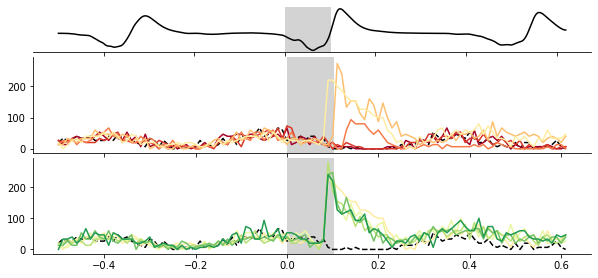

In [13]:
fig = plt.figure(figsize=(10, 10))
gs = matplotlib.gridspec.GridSpec(2, 1)

xs = np.arange(-.5, .62, 1/100)[:-1]
# sub_gridspec = gs[0].subgridspec(ncols=1, nrows=2, hspace=0)
# ax1 = fig.add_subplot(sub_gridspec[0])
# ax2 = fig.add_subplot(sub_gridspec[1])
plot_psth(fig, gs[0], units_usrt1, select_trials, 42, xs, resp=filt_snip)

In [5]:
def dendo_and_heatmaps(fig, gs, link, summed_response):
    
    sub_gridspec = gs.subgridspec(1, 2, wspace=0.1)
    sub_sub_gridspec = sub_gridspec[0].subgridspec(1, 2, wspace=0.0)

    dend_ax = fig.add_subplot(sub_sub_gridspec[0])
    dend = dendrogram(link, ax=dend_ax, orientation='left', truncate_mode=None, no_labels=True)
    dend_ax.set_ylabel('Units')
    dend_ax.set_xlabel('Distance')
    norm_heatmap_ax = fig.add_subplot(sub_sub_gridspec[1])
    resp_heatmap_ax = fig.add_subplot(sub_gridspec[1])
    im = norm_heatmap_ax.imshow(summed_response[dend['leaves'][::-1]]/np.max(summed_response, axis=-1)[dend['leaves'][::-1], np.newaxis], cmap='pink', aspect='auto')
#     plt.colorbar(mappable=im, ax=norm_heatmap_ax, aspect=40)
    norm_heatmap_ax.set_xticks(range(32))
    norm_heatmap_ax.set_xticklabels(glyphs, rotation=90);
    norm_heatmap_ax.set_yticks([])
    divider = make_axes_locatable(norm_heatmap_ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    plt.colorbar(im, cax=cax)
#    heatmap_cbar_ax = fig.add_subplot(sub_gridspec[39])
    plot_heatmap(resp_heatmap_ax, mean_usrt1, select_trials, dend['leaves'][::-1])
 #   normed_cbar_ax = fig.add_subplot(sub_gridspec[37])
#    plt.colorbar(mappable=im, cax=normed_cbar_ax)

def plot_heatmap(ax, mean_usrt, select_trials, sorted_args=None, time_offset=25, cmap='binary', time_ticks_base = None, colorbar_ax=None):  
    if sorted_args is None:
        sorted_args = np.argsort(np.argmax(mean_usrt[:, select_trials[::-1][-1]], axis=-1))
    im = ax.imshow(mean_usrt[sorted_args][:, select_trials[::-1], time_offset:].reshape(145, -1), cmap=cmap, aspect='auto')
    ax.axvspan(50-time_offset, 50-time_offset+10, color='y', alpha=0.2)
    time_len = mean_usrt.shape[-1] - time_offset
    if time_ticks_base is None:
        pre_window = time_offset/100 - .5
        post_window = time_len/100 + pre_window
        
        time_ticks_base = np.arange(pre_window, post_window, -1*pre_window)
    
    full_xs = np.arange(time_offset/100-.5, time_len/100, 1/100).round(2)
    print(full_xs.round(2))
    xticks_base = np.array([np.where(full_xs == i)[0][0] for i in time_ticks_base])
    
 #   xticks_base = np.linspace(0, time_len, int(pre_window*-100))
    print(xticks_base)
    time_ticks = []
    xticks = []
    for i in range(len(select_trials)):
        xticks.append(xticks_base+i*time_len)
        time_ticks.append(time_ticks_base)

    ax.set_xticks(np.concatenate(xticks))
    
    ax.set_xticklabels(np.concatenate(time_ticks), rotation=90)
    for i in range(1, 10):
        ax.axvline(87*i, color='k')
        ax.axvspan(25+87*i, 35+87*i, color='y', alpha=0.2)
        ax.text(17+87*i, -2, glyphs[select_trials[::-1][i]])
    if colorbar_ax is None:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='2.5%', pad=0.05)
        plt.colorbar(mappable=im, cax=cax)
    else:
        plt.colorbar(mappable=im, cax=colorbar_ax)
    ax.text(17, -2, glyphs[select_trials[-1]])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Units')

[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50 75]


NameError: name 'glyphs' is not defined

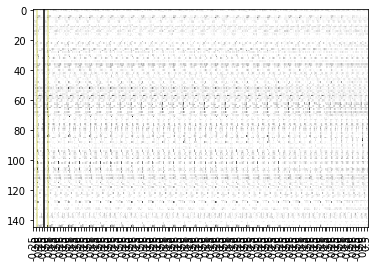

In [10]:
sub_gridspec = gs.subgridspec(1, 2, wspace=0.1)
sub_sub_gridspec = sub_gridspec[0].subgridspec(1, 2, wspace=0.0)

dend_ax = fig.add_subplot(sub_sub_gridspec[0])
dend = dendrogram(link, ax=dend_ax, orientation='left', truncate_mode=None, no_labels=True)
dend_ax.set_ylabel('Units')
dend_ax.set_xlabel('Distance')
norm_heatmap_ax = fig.add_subplot(sub_sub_gridspec[1])
resp_heatmap_ax = fig.add_subplot(sub_gridspec[1])
im = norm_heatmap_ax.imshow(summed_response[dend['leaves'][::-1]]/np.max(summed_response, axis=-1)[dend['leaves'][::-1], np.newaxis], cmap='pink', aspect='auto')
#     plt.colorbar(mappable=im, ax=norm_heatmap_ax, aspect=40)
norm_heatmap_ax.set_xticks(range(32))
norm_heatmap_ax.set_xticklabels(glyphs, rotation=90);
norm_heatmap_ax.set_yticks([])

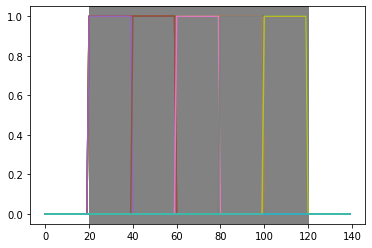

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plots_all = [br.binary_plotter(i, ax=ax) for i in select_trials]


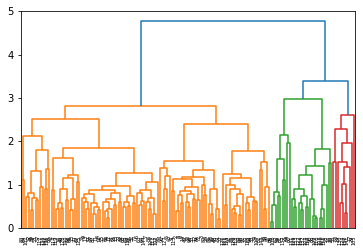

In [88]:
summed_response1 = mean_usrt1[:, :, 50:100].mean(axis=-1)/2
summed_response2 = mean_usrt2[:, :, 50:100].mean(axis=-1)/2
summed_response3 = mean_usrt3[:, :, 50:100].mean(axis=-1)/2
link = linkage(summed_response1/np.max(summed_response1, axis=-1)[:, np.newaxis], optimal_ordering=True, method='complete', )
dend = dendrogram(link)

In [36]:
def plot_dend_and_heatmap(fig, gs, summed_response, vmax, vmin=None, cmap='plasma'):
    if vmin is None:
        vmin = -vmax
    sub_gs = gs.subgridspec(1, 3, wspace=0)
    dend_ax = fig.add_subplot(sub_gs[-1])
    heatmap_ax = fig.add_subplot(sub_gs[:-1])
    link = linkage(summed_response, optimal_ordering=True, method='complete')
    dend = dendrogram(link, ax=dend_ax, orientation='right')
    im = heatmap_ax.imshow(summed_response[dend['leaves'][::-1]], cmap=cmap, aspect='auto', vmax=vmax, vmin=vmin)
    
    heatmap_ax.set_xticks(range(32))
    heatmap_ax.set_xticklabels(glyphs, rotation=90, fontsize=3)
    dend_ax.set_xticks([])
    return dend_ax, heatmap_ax, im, dend


(145, 32)


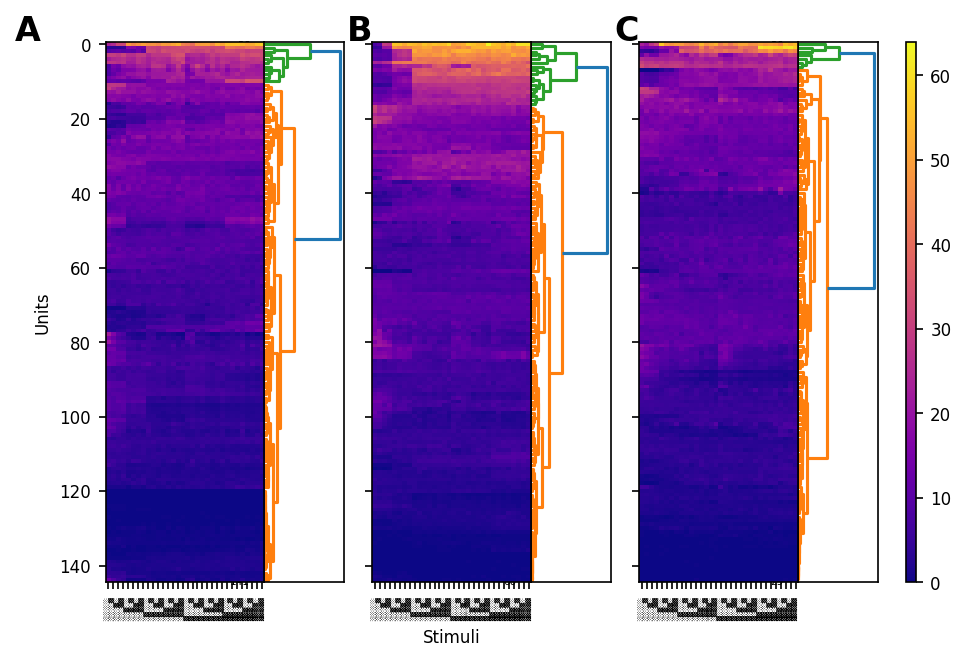

In [95]:
print(summed_response1.shape)
fig = plt.figure(figsize=(6, 4), dpi=150)
gs = GridSpec(1, 22, left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=3)
glob_vmax = np.max([summed_response1, summed_response2, summed_response3])
axs1 = plot_dend_and_heatmap(fig, gs[:7], summed_response1, glob_vmax)
axs2 = plot_dend_and_heatmap(fig, gs[7:14], summed_response2, glob_vmax)
axs3 = plot_dend_and_heatmap(fig, gs[14:21], summed_response3, glob_vmax)
[i.set_yticklabels([]) for i in [axs2[1], axs3[1]]]
axs1[1].set_ylabel('Units')
axs2[1].set_xlabel('Stimuli')
cbar_ax = fig.add_subplot(gs[-1])
plt.colorbar(mappable=axs1[-1], cax=cbar_ax)
# ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

# ax1.imshow(summed_response1, cmap='plasma')
# ax2.imshow(summed_response2, cmap='plasma')
# ax3.imshow(summed_response3, cmap='plasma')
label_axes.label_axes([axs1[1], axs2[1], axs3[1]], 'ABC', fontsize=16, fontweight='bold', align_y=[[0, 1, 2]], dx=-0.02)
plt.savefig('../../Thesis/Corrections/230207_blip_heatmap.pdf',bbox_inches='tight')

In [54]:
print(len(units_usrt1[0][0][0]))
summed_unit_usrt1 = [[np.mean(i[:, 50:100], axis=-1)/2 for i in j] for j in units_usrt1]
flat_summed_usrt1 = [np.concatenate(i) for i in summed_unit_usrt1]

unit_stds = [np.std(i) for i in flat_summed_usrt1] 
unit_means = [np.mean(i) for i in flat_summed_usrt1]
mean_usrt = np.array([[i.mean() for i in j] for j in summed_unit_usrt1])


112
(145, 32)


In [39]:
zscored_usrt1 = z_score_samp_indiv(units_usrt1)
zscored_usrt2 = z_score_samp_indiv(units_usrt2)
zscored_usrt3 = z_score_samp_indiv(units_usrt3)

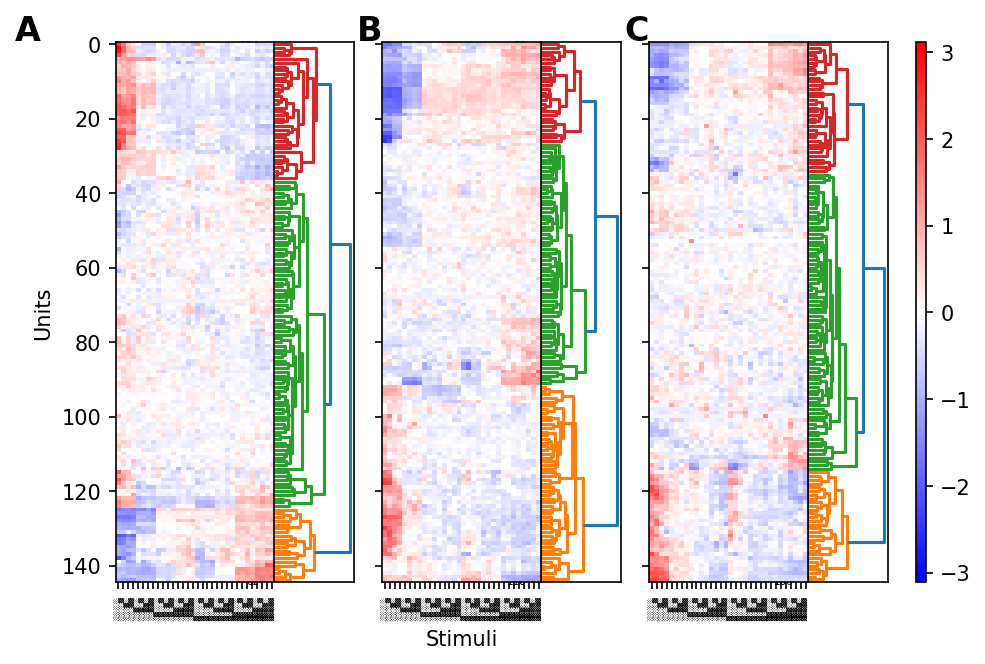

In [40]:

fig = plt.figure(figsize=(6, 4), dpi=150)
gs = GridSpec(1, 22, left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=3)
glob_vmax = np.max([zscored_usrt1, zscored_usrt2, zscored_usrt3])
axs1 = plot_dend_and_heatmap(fig, gs[:7], zscored_usrt1, glob_vmax, cmap='bwr')
axs2 = plot_dend_and_heatmap(fig, gs[7:14], zscored_usrt2, glob_vmax, cmap='bwr')
axs3 = plot_dend_and_heatmap(fig, gs[14:21], zscored_usrt3, glob_vmax, cmap='bwr')
[i.set_yticklabels([]) for i in [axs2[1], axs3[1]]]
axs1[1].set_ylabel('Units')
axs2[1].set_xlabel('Stimuli')
cbar_ax = fig.add_subplot(gs[-1])
plt.colorbar(mappable=axs1[2], cax=cbar_ax)
# ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

# ax1.imshow(summed_response1, cmap='plasma')
# ax2.imshow(summed_response2, cmap='plasma')
# ax3.imshow(summed_response3, cmap='plasma')
label_axes.label_axes([axs1[1], axs2[1], axs3[1]], 'ABC', fontsize=16, fontweight='bold', align_y=[[0, 1, 2]], dx=-0.02)
#plt.savefig('../../Thesis/Corrections/230207_blip_heatmap_zscored.pdf',bbox_inches='tight')

In [106]:
axs1[-1].keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

In [144]:
interias = []
silhouttes = []
for i in trange(2, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(zscored_usrt1)
    interias.append(kmeans.inertia_)
    silhouttes.append(silhouette_score(zscored_usrt1, kmeans.labels_))
    kmeans.fit(zscored_usrt2)
    interias.append(kmeans.inertia_)
    silhouttes.append(silhouette_score(zscored_usrt2, kmeans.labels_))
    kmeans.fit(zscored_usrt3)
    interias.append(kmeans.inertia_)
    silhouttes.append(silhouette_score(zscored_usrt3, kmeans.labels_))
    kmeans.fit(conc_zscored)
    interias.append(kmeans.inertia_)
    silhouttes.append(silhouette_score(conc_zscored, kmeans.labels_))

100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


In [137]:
inertias_rep = []
for i in trange(100):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(conc_zscored)
    inertias_rep.append(kmeans.inertia_)

100%|██████████| 100/100 [02:05<00:00,  1.26s/it]


{'bodies': [<matplotlib.collections.PolyCollection at 0x7fa48b1dfbe0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fa48aeb46a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fa48b1df6a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fa48b1df278>}

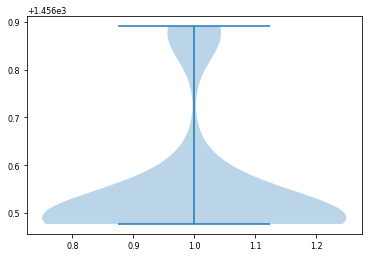

In [140]:
plt.violinplot(inertias_rep)

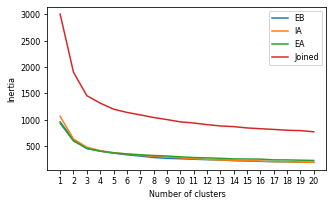

In [136]:
interias = np.array(interias).reshape(20,4)
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, 21), interias[:, 0], label='EB')
plt.plot(np.arange(1, 21), interias[:, 1], label='IA')
plt.plot(np.arange(1, 21), interias[:, 2], label='EA')
plt.plot(np.arange(1, 21), interias[:, 3], label='Joined')
plt.xticks(np.arange(1, 21));
plt.legend()
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.savefig('../../Thesis/Corrections/230208_kmeans_cluster_number.pdf', bbox_inches='tight')

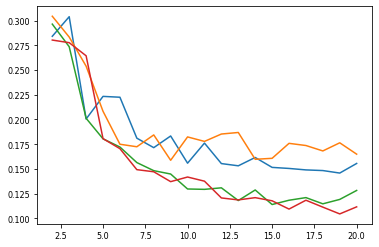

In [147]:
silhouttes = np.array(silhouttes).reshape(19, 4)
plt.plot(np.arange(2, 21), silhouttes[:, 0])
plt.plot(np.arange(2, 21), silhouttes[:, 1])
plt.plot(np.arange(2, 21), silhouttes[:, 2])
plt.plot(np.arange(2, 21), silhouttes[:, 3])

In [142]:
for i in range(20):
    

0.27767497257188656

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(zscored_usrt3)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1], dtype=int32)

In [45]:
conc_zscored = np.concatenate([zscored_usrt1, zscored_usrt2, zscored_usrt3])
kmeans = KMeans(n_clusters=3)
kmeans.fit(conc_zscored)


KMeans(n_clusters=3)

In [46]:
kmeans1 = KMeans(n_clusters=3)
kmeans2 = KMeans(n_clusters=3)
kmeans3 = KMeans(n_clusters=3)
kmeansj = KMeans(n_clusters=3)
[i.fit(j) for i, j in zip([kmeans1, kmeans2, kmeans3, kmeansj], [zscored_usrt1, zscored_usrt2, zscored_usrt3, conc_zscored])]

[KMeans(n_clusters=3),
 KMeans(n_clusters=3),
 KMeans(n_clusters=3),
 KMeans(n_clusters=3)]

In [34]:
print(rand_score(kmeans1.labels_, kmeansj.labels_[:145]))
print(rand_score(kmeans2.labels_, kmeansj.labels_[145:290]))
print(rand_score(kmeans3.labels_, kmeansj.labels_[-145:]))

0.9899425287356322
0.7787356321839081
0.8585249042145594


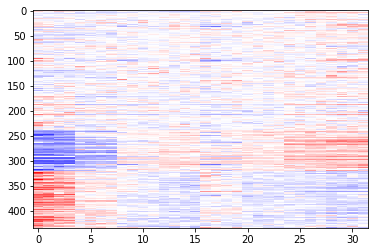

In [17]:
sorted_labs = np.argsort(kmeans.labels_)
plt.imshow(conc_zscored[sorted_labs], vmin=-3, vmax=3, cmap='bwr', aspect='auto')


In [224]:
clus1 = zscored_usrt3[kmeans3.labels_ == 0]
clus2 = zscored_usrt3[kmeans3.labels_ == 1]
clus3 = zscored_usrt3[kmeans3.labels_ == 2]

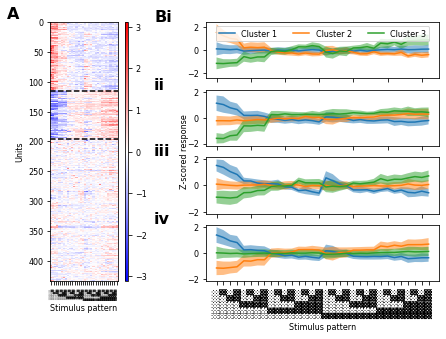

In [49]:
fig = plt.figure(figsize=(6, 4))
gs = GridSpec(4, 3, left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=1)
zs_ax = fig.add_subplot(gs[:, 0])
label_lens = np.cumsum([len(np.where(kmeansj.labels_ == i)[0]) for i in range(3)])
vmax = np.max(abs(conc_zscored))
zs_im = zs_ax.imshow(conc_zscored[np.argsort(kmeansj.labels_)], cmap='bwr', vmin=-vmax, vmax=vmax, aspect='auto')
for i in label_lens[:-1]:
    zs_ax.axhline(i, color='k', linestyle='--')
ax1 = fig.add_subplot(gs[0, 1:])
ax2 = fig.add_subplot(gs[1, 1:])
ax3 = fig.add_subplot(gs[2, 1:])
ax4 = fig.add_subplot(gs[3, 1:])
[plot_mean_and_std(ax1, zscored_usrt1[kmeans1.labels_ == i], label=f'Cluster {i+1}') for i in range(3)]
[plot_mean_and_std(ax2, zscored_usrt2[kmeans2.labels_ == i], label=f'Cluster {i+1}') for i in range(3)]
[plot_mean_and_std(ax3, zscored_usrt3[kmeans3.labels_ == i], label=f'Cluster {i+1}') for i in range(3)]
[plot_mean_and_std(ax4, conc_zscored[kmeansj.labels_ == i], label=f'Cluster {i+1}') for i in range(3)]
[i.set_xticklabels([]) for i in [ax1, ax2, ax3]]
[i.set_xticks(range(32)) for i in [zs_ax, ax4]]
zs_ax.set_xticklabels(glyphs, rotation=90, fontsize=3)
ax4.set_xticklabels(glyphs, rotation=90, fontsize=8);
zs_ax.set_ylabel('Units')
zs_ax.set_xlabel('Stimulus pattern')
ax4.set_xlabel('Stimulus pattern')
ax1.legend(ncol=3, loc='upper center')
label_ax = fig.add_subplot(gs[:, 1:], frameon=False)
label_ax.set_xticks([])
label_ax.set_yticks([])
label_ax.set_ylabel('Z-scored response', labelpad=17)
label_axes.label_axes([zs_ax, ax1, ax2, ax3, ax4], ['A', 'Bi', 'ii', 'iii', 'iv'], fontsize=16, fontweight='bold', dx=-0.07, align_x=[[1, 2, 3, 4]], x=[-0.05, 0.29, 0.29, 0.29, 0.29])
[i.set_ylim(-max(np.abs(i.get_ylim())), max(np.abs(i.get_ylim()))) for i in [ax1, ax2, ax3, ax4]];
divider = make_axes_locatable(zs_ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(mappable=zs_im, cax=cax)
#plt.savefig('../../Thesis/Corrections/230208_kmeans_joint.pdf', bbox_inches='tight')

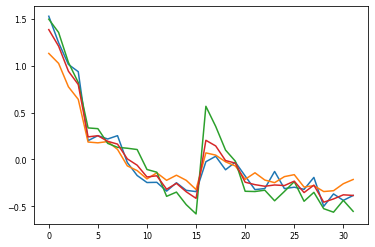

In [60]:
mean_clus1 = np.mean([np.mean(zscored_usrt1[kmeans1.labels_ == 1], axis=0),
                      np.mean(zscored_usrt2[kmeans2.labels_ == 0], axis=0),
                      np.mean(zscored_usrt3[kmeans3.labels_ == 0], axis=0)], axis=0)
                     
plt.plot(np.mean(zscored_usrt1[kmeans1.labels_ == 1], axis=0))
plt.plot(np.mean(zscored_usrt2[kmeans2.labels_ == 0], axis=0))
plt.plot(np.mean(zscored_usrt3[kmeans3.labels_ == 0], axis=0))
plt.plot(mean_clus1)

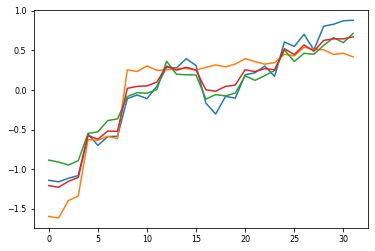

In [86]:
mean_clus1 = np.mean([np.mean(zscored_usrt1[kmeans1.labels_ == 2], axis=0),
                      np.mean(zscored_usrt2[kmeans2.labels_ == 2], axis=0),
                      np.mean(zscored_usrt3[kmeans3.labels_ == 2], axis=0)], axis=0)
                     
plt.plot(np.mean(zscored_usrt1[kmeans1.labels_ == 2], axis=0))
plt.plot(np.mean(zscored_usrt2[kmeans2.labels_ == 2], axis=0))
plt.plot(np.mean(zscored_usrt3[kmeans3.labels_ == 2], axis=0))
plt.plot(mean_clus1)

In [77]:
print(np.argsort(mean_clus1))

[28 29 15 31 30 26 14 12 22 24 27 23 21 13 20 25 10 11  9 19 18  8 17  7
  6 16  4  5  3  2  1  0]


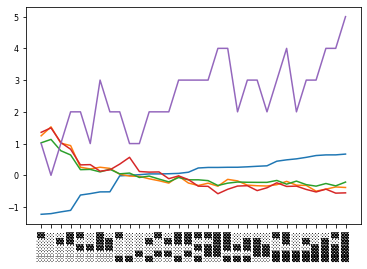

In [87]:
plt.plot(mean_clus1[np.argsort(mean_clus1)])
plt.plot(np.mean(zscored_usrt1[kmeans1.labels_ == 1], axis=0)[np.argsort(mean_clus1)])
plt.plot(np.mean(zscored_usrt2[kmeans2.labels_ == 0], axis=0)[np.argsort(mean_clus1)])
plt.plot(np.mean(zscored_usrt3[kmeans3.labels_ == 0], axis=0)[np.argsort(mean_clus1)])
plt.xticks(range(32), labels=np.array(glyphs)[np.argsort(mean_clus1)], rotation=90);
plt.plot(em.trial_arrays['base_array'].sum(axis=-1)[np.argsort(mean_clus1)])

[0.86672623 0.86593462 0.82105837 0.8597674 ] [-0.66529267 -0.69716771 -0.79343071 -0.73237201]


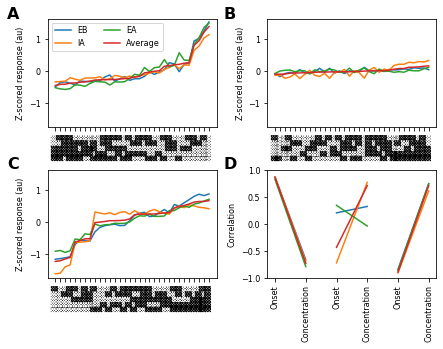

In [196]:
def plot_cluster_weights(ax, cluster_ids):
    mean_cluster = np.mean([np.mean(zscored_usrt1[kmeans1.labels_ == cluster_ids[0]], axis=0),
                            np.mean(zscored_usrt2[kmeans2.labels_ == cluster_ids[1]], axis=0), 
                            np.mean(zscored_usrt3[kmeans3.labels_ == cluster_ids[2]], axis=0)], axis=0)
    sorted_arg = np.argsort(mean_cluster)
    ax.plot(np.mean(zscored_usrt1[kmeans1.labels_ == cluster_ids[0]], axis=0)[sorted_arg], label='EB')
    ax.plot(np.mean(zscored_usrt2[kmeans2.labels_ == cluster_ids[1]], axis=0)[sorted_arg], label='IA')
    ax.plot(np.mean(zscored_usrt3[kmeans3.labels_ == cluster_ids[2]], axis=0)[sorted_arg], label='EA')
    ax.plot(mean_cluster[sorted_arg], label='Average')
    ax.set_xticks(range(32))
    ax.set_xticklabels(np.array(glyphs)[sorted_arg], rotation=90, fontsize=7)
    corrs = np.corrcoef([np.mean(zscored_usrt1[kmeans1.labels_ == cluster_ids[0]], axis=0), 
                      np.mean(zscored_usrt2[kmeans2.labels_ == cluster_ids[1]], axis=0), 
                      np.mean(zscored_usrt3[kmeans3.labels_ == cluster_ids[2]], axis=0)])
    indiv_clusters = [np.mean(zscored_usrt1[kmeans1.labels_ == cluster_ids[0]], axis=0), 
                      np.mean(zscored_usrt2[kmeans2.labels_ == cluster_ids[1]], axis=0), 
                      np.mean(zscored_usrt3[kmeans3.labels_ == cluster_ids[2]], axis=0)]
    return mean_cluster, indiv_clusters
fig = plt.figure(figsize=(6, 4))
gs = GridSpec(2, 2, left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
mc1, ic1 = plot_cluster_weights(ax1, [1, 0, 0])
mc2, ic2 = plot_cluster_weights(ax2, [0, 1, 1])
mc3, ic3 = plot_cluster_weights(ax3, [2, 2, 2])
set_global_ylim([ax1, ax2, ax3])
ax1.legend(ncol=2)
clus1_onset = np.corrcoef(ic1 + [mc1] + [onset_sum])[-1, :-1]
clus1_conc = np.corrcoef(ic1 + [mc1] + [conc_sum])[-1, :-1]
clus2_onset = np.corrcoef(ic2 + [mc2] + [onset_sum])[-1, :-1]
clus2_conc = np.corrcoef(ic2 + [mc2] + [conc_sum])[-1, :-1]
clus3_onset = np.corrcoef(ic3 + [mc3] + [onset_sum])[-1, :-1]
clus3_conc = np.corrcoef(ic3 + [mc3] + [conc_sum])[-1, :-1]

ax4 = fig.add_subplot(gs[1, 1])
print(clus1_onset, clus1_conc)
ax4.plot([clus1_onset, clus1_conc])
for i in range(4):
    ax4.plot([2, 3], [clus2_onset[i], clus2_conc[i]], color=f'C{i}')
    ax4.plot([4, 5], [clus3_onset[i], clus3_conc[i]], color=f'C{i}')
ax4.set_xticks(range(6))
ax4.set_xticklabels(['Onset', 'Concentration', 'Onset', 'Concentration', 'Onset', 'Concentration'], rotation=90)
ax4.set_ylim(-1, 1)
ax4.set_ylabel('Correlation')
ax1.set_ylabel('Z-scored response (au)')
ax2.set_ylabel('Z-scored response (au)')
ax3.set_ylabel('Z-scored response (au)')
# corr_ax1 = fig.add_subplot(gs[0, -1])
# corr_ax1.imshow(np.corrcoef([np.mean(zscored_usrt1[kmeans1.labels_ == 1], axis=0), 
#                               np.mean(zscored_usrt2[kmeans2.labels_ == 0], axis=0), 
#                               np.mean(zscored_usrt3[kmeans3.labels_ == 0], axis=0),
#                              np.mean(zscored_usrt1[kmeans1.labels_ == 0], axis=0),
#                              np.mean(zscored_usrt2[kmeans2.labels_ == 1], axis=0),
#                              np.mean(zscored_usrt3[kmeans3.labels_ == 1], axis=0),
#                              np.mean(zscored_usrt1[kmeans1.labels_ == 2], axis=0),
#                              np.mean(zscored_usrt2[kmeans2.labels_ == 2], axis=0),
#                              np.mean(zscored_usrt3[kmeans3.labels_ == 2], axis=0)
#                             ]), vmin=-1, vmax=1, cmap='bwr')
# corr_ax2 = fig.add_subplot(gs[1, -1])
# corr_ax2.imshow(np.corrcoef([mc1, mc2, mc3, onset_sum]))
#plt.savefig('../../Thesis/Corrections/230209_cluster_weightings_ordered.pdf', bbox_inches='tight')
label_axes.label_axes([ax1, ax2, ax3, ax4], 'ABCD', align_x=[[0, 2], [1, 3]], align_y=[[0, 1], [2, 3]], fontsize=16, fontweight='bold', dx=-0.02)
plt.savefig('../../Thesis/Corrections/230209_clusters_sorted.pdf', bbox_inches='tight')

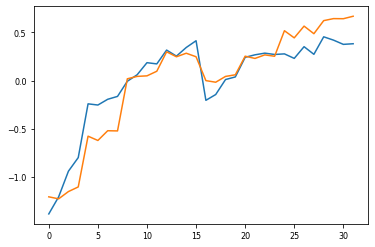

In [195]:
plt.plot(mc1*-1)
plt.plot(mc3)

In [230]:
print(np.corrcoef(mc1, mc3))

[[ 1.         -0.94504491]
 [-0.94504491  1.        ]]


In [ ]:
print(np.corrcoef())

In [165]:
onset_ohe = em.trial_arrays['cao_array'][:, :5]

onset_sum = np.where(onset_ohe == 1)[1]+1
onset_sum = np.append(onset_sum, [0])
print(onset_sum)
print(len(onset_sum))
print(np.corrcoef(mc1, onset_sum))
conc_sum = em.trial_arrays['base_array'].sum(axis=-1)

[5 4 4 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
32
[[1.        0.8597674]
 [0.8597674 1.       ]]


In [137]:
print(np.corrcoef(em.trial_arrays['base_array'].sum(axis=-1), mc1))

[[ 1.         -0.73237201]
 [-0.73237201  1.        ]]


In [292]:
print(np.corrcoef([kmeans1.labels_, kmeans2.labels_, kmeans3.labels_]))

[[ 1.         -0.4067116   0.36825447]
 [-0.4067116   1.         -0.49427548]
 [ 0.36825447 -0.49427548  1.        ]]


In [301]:
print(rand_score(kmeans1.labels_, kmeans2.labels_))
print(rand_score(kmeans1.labels_, kmeans3.labels_))
print(rand_score(kmeans2.labels_, kmeans3.labels_))


0.6059386973180076
0.6367816091954023
0.64272030651341


In [309]:
print(len(kmeans1.labels_[kmeans1.labels_ == 1]))

20


In [305]:
len(kmeans1.labels_[(kmeans1.labels_ == 0) | (kmeans2.labels_ == 0)])

103

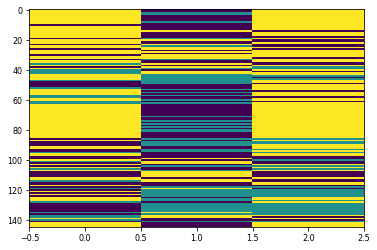

In [297]:
plt.imshow(np.array([kmeans1.labels_, kmeans2.labels_, kmeans3.labels_]).T, aspect='auto')

NameError: name 'clus1' is not defined

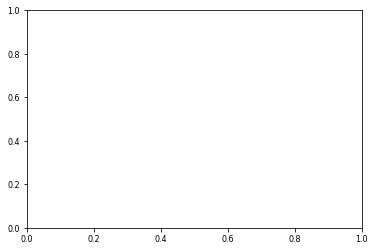

In [48]:
def plot_errorbars(ax, data, xs=None, color=None):
    if xs is None:
        xs = range(len(data[0]))
    mean_data = np.mean(data, axis=0)
    std_data = np.std(data, axis=0)
    ax.errorbar(xs, mean_data, yerr=std_data, fmt='o', capsize=3)
def plot_mean_and_std(ax, data, xs= None, color=None, label=None):
    if xs is None:
        xs = range(len(data[0]))
    mean_data = np.mean(data, axis=0)
    std_data = np.std(data, axis=0)
    mins = mean_data - std_data
    maxs = mean_data + std_data
    ax.plot(xs, mean_data, label=label)
    ax.fill_between(xs, mins, maxs, alpha=0.5)

plt.figure()
ax = plt.gca()
plot_mean_and_std(ax, clus1)
plot_mean_and_std(ax, clus2)
plot_mean_and_std(ax, clus3)

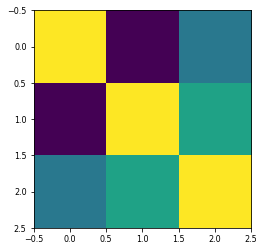

In [230]:
plt.imshow(np.corrcoef([np.mean(clus1, axis=0), np.mean(clus2, axis=0), np.mean(clus3, axis=0)]))

<ErrorbarContainer object of 3 artists>

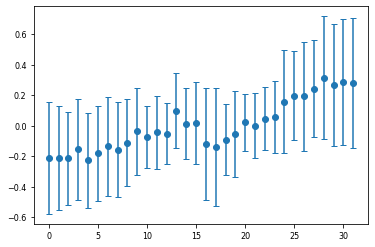

In [209]:
mean_clus = np.mean(clus1, axis=0)
std_clus = np.std(clus1, axis=0)
plt.errorbar(range(32), mean_clus, yerr=std_clus, fmt='o', capsize=3)

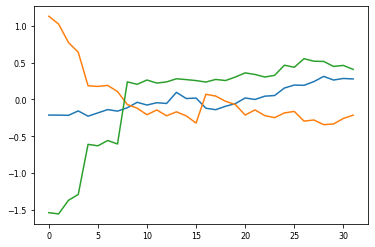

In [203]:
plt.plot(np.mean(clus1, axis=0))
plt.plot(np.mean(clus2, axis=0))
plt.plot(np.mean(clus3, axis=0))

In [49]:
print(np.where(kmeans1.labels_ == 0))
print(np.where(kmeans1.labels_ == 1))
print(np.where(kmeans1.labels_ == 2))

(array([ 10,  19,  23,  26,  30,  33,  38,  48,  49,  50,  51,  86,  88,
        89,  90,  93,  94,  98,  99, 102, 104, 108, 109, 110, 111, 115,
       116, 118, 120, 122, 124, 129, 130, 131, 132, 133, 134, 136, 141]),)
(array([ 36,  40,  41,  42,  47,  52,  57,  58,  61,  62,  95, 101, 106,
       114, 119, 128, 135, 137, 138, 140]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
        14,  15,  16,  17,  18,  20,  21,  22,  24,  25,  27,  28,  29,
        31,  32,  34,  35,  37,  39,  43,  44,  45,  46,  53,  54,  55,
        56,  59,  60,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        87,  91,  92,  96,  97, 100, 103, 105, 107, 112, 113, 117, 121,
       123, 125, 126, 127, 139, 142, 143, 144]),)


In [121]:
print(np.where(kmeans2.labels_ == 0))
print(np.where(kmeans2.labels_ == 1))
print(np.where(kmeans2.labels_ == 2))

(array([  0,   1,   4,   5,   6,   7,   9,  10,  11,  12,  13,  15,  16,
        17,  18,  21,  22,  27,  29,  34,  35,  37,  40,  50,  51,  52,
        54,  56,  58,  59,  61,  63,  64,  65,  66,  67,  68,  69,  70,
        72,  73,  75,  77,  79,  82,  83,  84,  85,  87,  91,  92,  95,
        96,  97,  98, 100, 103, 105, 106, 112, 115, 116, 117, 125, 128,
       139, 140, 142, 143, 144]),)
(array([  2,   3,   8,  19,  24,  33,  39,  43,  44,  45,  46,  47,  48,
        49,  53,  55,  57,  60,  62,  71,  74,  76,  78,  80,  81,  86,
        88,  89,  90,  93,  94, 104, 107, 118, 120, 121, 122, 123, 124,
       126, 127, 129, 130, 131, 132, 133, 134, 136, 141]),)
(array([ 14,  20,  23,  25,  26,  28,  30,  31,  32,  36,  38,  41,  42,
        99, 101, 102, 108, 109, 110, 111, 113, 114, 119, 135, 137, 138]),)


In [122]:
print(np.where(kmeans3.labels_ == 0))
print(np.where(kmeans3.labels_ == 1))
print(np.where(kmeans3.labels_ == 2))

(array([ 14,  18,  20,  21,  23,  24,  26,  32,  35,  36,  41,  45,  49,
        54,  58,  61,  98,  99, 101, 102, 108, 109, 110, 111, 113, 114,
       117, 119, 138, 140]),)
(array([ 38,  39,  44,  46,  86,  88,  89,  93,  95, 100, 104, 106, 118,
       120, 121, 122, 123, 124, 127, 129, 130, 131, 132, 133, 134, 135,
       136, 141]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  17,  19,  22,  25,  27,  28,  29,  30,  31,  33,
        34,  37,  40,  42,  43,  47,  48,  50,  51,  52,  53,  55,  56,
        57,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  87,  90,  91,  92,  94,  96,  97, 103, 105, 107, 112, 115,
       116, 125, 126, 128, 137, 139, 142, 143, 144]),)


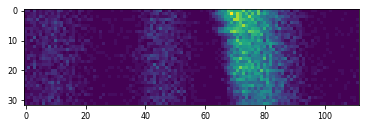

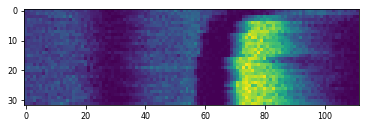

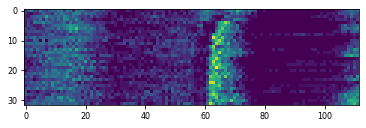

In [52]:
plt.imshow(mean_usrt1[26])
plt.figure()
plt.imshow(mean_usrt1[36])
plt.figure()
plt.imshow(mean_usrt1[144])

In [160]:
print(np.where(np.argsort(kmeans3.labels_) == 144))

(array([144]),)


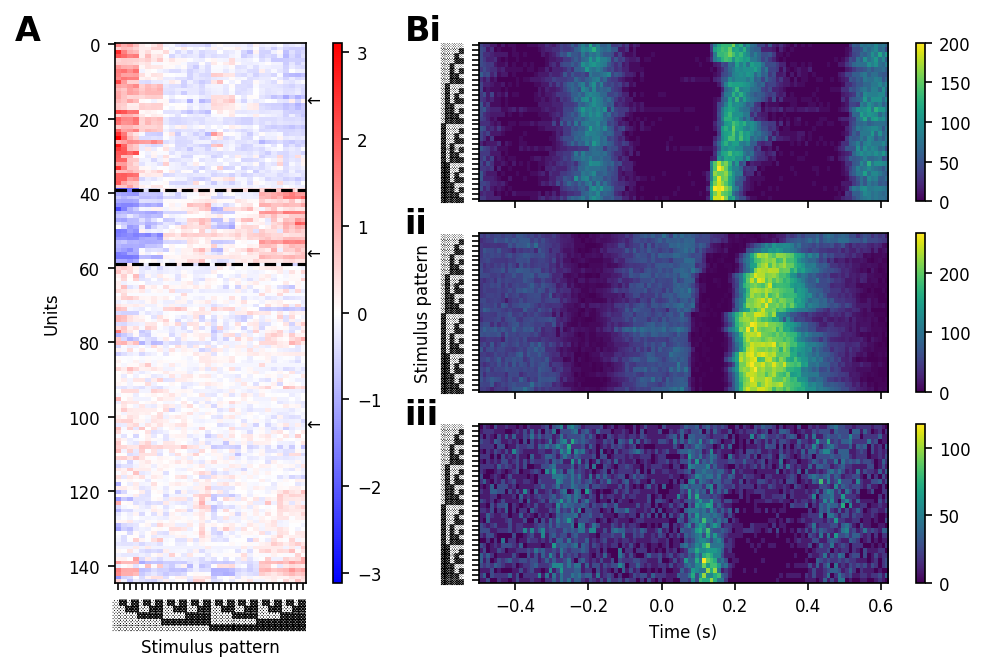

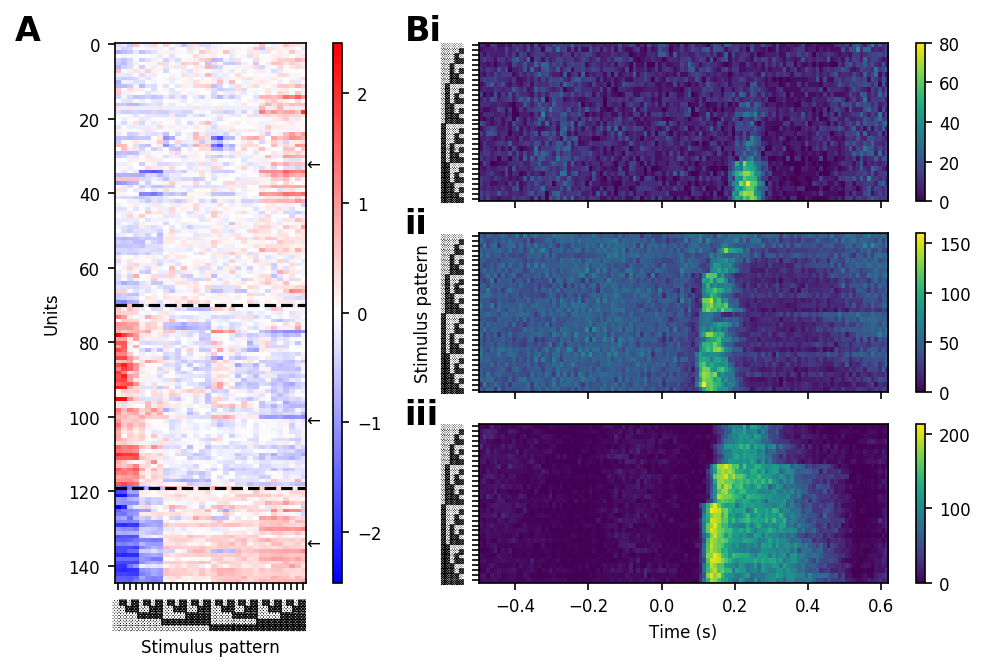

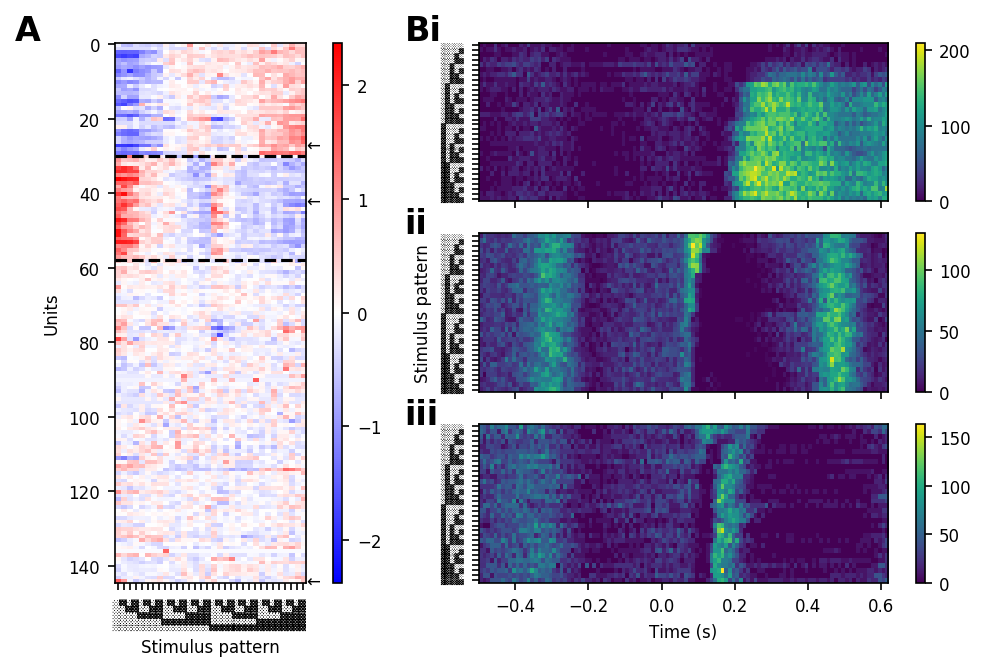

In [254]:

def plot_kmeans_cluster_heatmaps(fig, zscored, kmeans, mean_usrt, cis, vmax=None):
    if vmax is None:
        vmax = np.max(abs(zscored))
    gs = GridSpec(3, 23, left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=3)
    zs_ax = fig.add_subplot(gs[:, :6])
    label_lens = np.cumsum([len(np.where(kmeans.labels_ == i)[0]) for i in range(3)])
    zs_im = zs_ax.imshow(zscored[np.argsort(kmeans.labels_)], cmap='bwr', vmin=-vmax, vmax=vmax, aspect='auto')
    for i in label_lens[:-1]:
        zs_ax.axhline(i, color='k', linestyle='--')
    examp_indexes = [np.where(np.argsort(kmeans.labels_) == i)[0] for i in cis]
    examp_ax1 = fig.add_subplot(gs[0, 10:-1])
    examp_ax2 = fig.add_subplot(gs[1, 10:-1])
    examp_ax3 = fig.add_subplot(gs[2, 10:-1])
    vmax = np.max(mean_usrt[cis])
    heim = examp_ax1.imshow(mean_usrt[cis[0]], extent=(-0.5, 0.62, 31.5, -0.5), aspect='auto', vmin=0)
    cbar_ax1 = fig.add_subplot(gs[0, -1])
    plt.colorbar(cax=cbar_ax1, mappable=heim)
    heim = examp_ax2.imshow(mean_usrt[cis[1]], extent=(-0.5, 0.62, 31.5, -0.5), aspect='auto', vmin=0)
    cbar_ax2 = fig.add_subplot(gs[1, -1])
    plt.colorbar(cax=cbar_ax2, mappable=heim)
    heim = examp_ax3.imshow(mean_usrt[cis[2]], extent=(-0.5, 0.62, 31.5, -0.5), aspect='auto', vmin=0)
    cbar_ax3 = fig.add_subplot(gs[2, -1])
    plt.colorbar(cax=cbar_ax3, mappable=heim)
    examp_ax1.set_xticklabels([])
    examp_ax2.set_xticklabels([])
    [i.set_yticks(range(32)) for i in [examp_ax1, examp_ax2, examp_ax3]]
    [i.set_yticklabels(glyphs, fontsize=3) for i in [examp_ax1, examp_ax2, examp_ax3]]
    [i.set_ylim(31.5, -0.5) for i in [examp_ax1, examp_ax2, examp_ax3]]
    examp_ax3.set_xlabel('Time (s)')
    examp_ax2.set_ylabel('Stimulus pattern')
    zs_ax.set_ylabel('Units')
    zs_ax.set_xticks(range(32))
    zs_ax.set_xticklabels(glyphs, rotation=90, fontsize=4)
    [zs_ax.text(31.5, i+1.5, '\u2190') for i in examp_indexes]
    cbar_ax_z = fig.add_subplot(gs[:, 6])
    plt.colorbar(mappable=zs_im, cax=cbar_ax_z)
    label_axes.label_axes([zs_ax, examp_ax1, examp_ax2, examp_ax3], ['A', 'Bi', 'ii', 'iii'], align_y=[[0, 1]], align_x=[[1, 2, 3]], fontsize=16, fontweight='bold', dx=-0.03)
    zs_ax.set_xlabel('Stimulus pattern')
fig = plt.figure(figsize=(6, 4), dpi=150)
plot_kmeans_cluster_heatmaps(fig, zscored_usrt1, kmeans1, mean_usrt1, [49, 36, 9])
plt.savefig('../../Thesis/Corrections/230208_kmean_odour1.pdf', bbox_inches='tight')
fig = plt.figure(figsize=(6, 4), dpi=150)
plot_kmeans_cluster_heatmaps(fig, zscored_usrt2, kmeans2, mean_usrt2, [112, 71, 23])
plt.savefig('../../Thesis/Corrections/230208_kmean_odour2.pdf', bbox_inches='tight')
fig = plt.figure(figsize=(6, 4), dpi=150)
plot_kmeans_cluster_heatmaps(fig, zscored_usrt3, kmeans3, mean_usrt3, [14, 86, 144])
plt.savefig('../../Thesis/Corrections/230208_kmean_odour3.pdf', bbox_inches='tight')

In [199]:
fig, ax = p;t
conc_zscored

(435, 32)

In [38]:
def z_score_samp_indiv(usrt, time_slice=slice(50, 100)):
    summed_unit_usrt = [[np.mean(i[:, 50:100], axis=-1)/2 for i in j] for j in usrt]
    flat_summed_usrt = [np.concatenate(i) for i in summed_unit_usrt]

    unit_stds = np.array([np.std(i) for i in flat_summed_usrt] )
    unit_means = np.array([np.mean(i) for i in flat_summed_usrt])
    mean_usrt = np.array([[i.mean() for i in j] for j in summed_unit_usrt])
    z_scored_mean_usrt = mean_usrt - unit_means[:, np.newaxis]
    z_scored_mean_usrt = z_scored_mean_usrt/unit_stds[:, np.newaxis]
    return z_scored_mean_usrt

[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50 75]


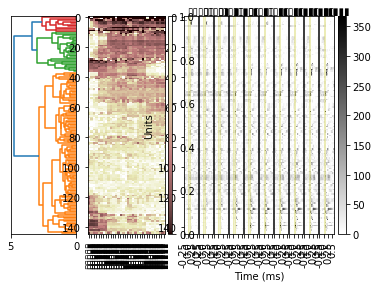

In [17]:
fig = plt.figure()
gs = matplotlib.gridspec.GridSpec(1, 1)
dendo_and_heatmaps(fig, gs[0], link, summed_response1)

In [17]:
def stimuli_plot(ax, stim_plots):
    for index, i in enumerate(stim_plots[:-1][::-1]):
        ax.step(range(len(i)), i-index*1.5, color=matplotlib.cm.RdYlGn(index/(len(stim_plots)-1)))
    ax.axis('off')
    ax.axvspan(20, 120, color='lightgray')
    return ax
def stimuli_plot_glyphs(ax, glyphs, select_trials):
    for index, i in enumerate(select_trials[:-1][::-1]):
        ax.text(0.6, .9-index/(len(select_trials)-1), glyphs[i], color=matplotlib.cm.RdYlGn(index/(len(select_trials)-1)), fontsize=20)
    ax.axis('off')
    return ax

In [19]:
### Getting the PID and flow recording
odour_path = "/home/camp/warnert/working/Recordings/Set up recordings/200615 - Binary pulse calibration/"


EB_trials = open(odour_path + '2020-06-15trial_name_flowmeter_EB_2.txt', 'r').readlines()
trial_order = []
for i in EB_trials:
    if ':' not in i:
        trial_order.append(i.split('_')[1][:-1])
EB_flows = sio.loadmat(odour_path+'Flowmeter_EB_pulses_3.mat')
print(EB_flows.keys())
trig = EB_flows['Flowmeter_EB_pulses_3_Ch8'][-1][-1][-1]
EB_flowmeter = EB_flows['Flowmeter_EB_pulses_3_Ch7'][-1][-1][-1]
print(EB_flows.keys())

EB_PIDs = sio.loadmat(odour_path+'PID_all_pulses_PID.mat')

PID = EB_PIDs['PID_all_pulses_PID_Ch6'][-1][-1][-1]
PID_trig = EB_PIDs['PID_all_pulses_PID_Ch8'][-1][-1][-1]

PID_trials = open(odour_path+'2020-06-15trial_name.txt', 'r').readlines()
PID_order = []
for i in PID_trials:
    if ':' not in i:
        PID_order.append(i.split('_')[1][:-1])
        

IA_flows = sio.loadmat(odour_path+'Flowmeter_IA_pulses.mat')
trig_IA = IA_flows['Flowmeter_IA_pulses_Ch8'][-1][-1][-1]
flowmeter_IA = IA_flows['Flowmeter_IA_pulses_Ch7'][-1][-1][-1]

IA_trials = open(odour_path+'2020-06-15trial_name_flowmeter_IA.txt')
IA_order = []

for i in IA_trials:
    if ':' not in i:
        IA_order.append(i.split('_')[1][:-1])
        
prev_start = 0
EB_flow_starts = []
for index, i in enumerate(trig):
    if i > 1 and index - prev_start > 10000:
        EB_flow_starts.append(index)
        prev_start = index

        
PID_starts = []
prev_start = 0
for index, i in enumerate(PID_trig):
    if i > .5 and index - prev_start > 10000:
        PID_starts.append(index)
        prev_start = index
print(len(PID_starts)/32)

IA_starts = []
prev_start = 0
for index, i in enumerate(trig_IA):
    if i > 1 and index - prev_start > 10000:
        IA_starts.append(index)
        prev_start = index
        
trial_order = np.array(trial_order)
PID_order = np.array(PID_order)
EB_flow_starts = np.array(EB_flow_starts)
PID_starts = np.array(PID_starts)
IA_starts = np.array(IA_starts)
IA_order = np.array(IA_order)
fs = 10000
pre_window=0.5
post_window=0.62
#trial_order.astype(np.int)
all_trial_flows = []
all_trials_PID = []
all_trials_IA = []
for i in range(32):
    trial_starts = EB_flow_starts[(trial_order == str(i))]
    trial_flows = [EB_flowmeter[int(j-fs*pre_window):int(j+fs*post_window)] for j in trial_starts]
    all_trial_flows.append(trial_flows)
    PID_trials = PID_starts[(PID_order == str(i))]
    trial_PIDs = [PID[int(j-fs*pre_window):int(j+fs*post_window)] for j in PID_trials]
    all_trials_PID.append(trial_PIDs)
    
    trials_IA = IA_starts[(IA_order == str(i))]
    trial_IAs = [flowmeter_IA[int(j - fs*pre_window):int(j+fs*post_window)] for j in trials_IA]
    all_trials_IA.append(trial_IAs)
mean_trial_flows = np.mean(all_trial_flows, axis=1)
mean_trial_PIDs = np.mean(all_trials_PID, axis=1)
mean_trial_IA = np.mean(all_trials_IA, axis=1)

mats = sio.loadmat('/home/camp/warnert/working/Recordings/Set up recordings/200618 - Binary pulse calibration/200618_EB_IA_5_reps_altered_duties.mat')
print(mats.keys())
trigs = mats['V200618_EB_IA_5_reps_altered_duties_Ch8'][-1][-1][-1]
flows = mats['V200618_EB_IA_5_reps_altered_duties_Ch7'][-1][-1][-1]

prev_start = 0 
flow_starts = []
for index, i in enumerate(trigs):
    if i > 1 and index - prev_start > 10000:
        flow_starts.append(index)
        prev_start = index
        
all_flows = []
for i in range(64):
    reps = flow_starts[i::64]
    flow_reps = [flows[j-2000:j+5000] for j in reps]
    all_flows.append(flow_reps)

dict_keys(['__header__', '__version__', '__globals__', 'Flowmeter_EB_pulses_3_Ch1', 'Flowmeter_EB_pulses_3_Ch2', 'Flowmeter_EB_pulses_3_Ch3', 'Flowmeter_EB_pulses_3_Ch4', 'Flowmeter_EB_pulses_3_Ch5', 'Flowmeter_EB_pulses_3_Ch6', 'Flowmeter_EB_pulses_3_Ch7', 'Flowmeter_EB_pulses_3_Ch8', 'Flowmeter_EB_pulses_3_Ch31'])
dict_keys(['__header__', '__version__', '__globals__', 'Flowmeter_EB_pulses_3_Ch1', 'Flowmeter_EB_pulses_3_Ch2', 'Flowmeter_EB_pulses_3_Ch3', 'Flowmeter_EB_pulses_3_Ch4', 'Flowmeter_EB_pulses_3_Ch5', 'Flowmeter_EB_pulses_3_Ch6', 'Flowmeter_EB_pulses_3_Ch7', 'Flowmeter_EB_pulses_3_Ch8', 'Flowmeter_EB_pulses_3_Ch31'])
5.0
dict_keys(['__header__', '__version__', '__globals__', 'V200618_EB_IA_5_reps_altered_duties_Ch1', 'V200618_EB_IA_5_reps_altered_duties_Ch2', 'V200618_EB_IA_5_reps_altered_duties_Ch3', 'V200618_EB_IA_5_reps_altered_duties_Ch4', 'V200618_EB_IA_5_reps_altered_duties_Ch5', 'V200618_EB_IA_5_reps_altered_duties_Ch6', 'V200618_EB_IA_5_reps_altered_duties_Ch7', 'V20

In [20]:
def plot_pid_and_flow(trial_num, ax, legend=False):
    xs = np.arange(-.2, .5, 1/10000)
    for i in all_flows[trial_num]:
        ax.plot(xs, i, color='skyblue', alpha=0.4)
    ax.plot(xs, np.mean(all_flows, axis=1)[trial_num], label='Flow')
    #ax.set_ylabel('Flowmeter voltage')
    ax2 = ax.twinx()
    ax2.plot([], label='Flow')
    for i in all_trials_PID[trial_num]:
        ax2.plot(xs, i[3070:10070], alpha=0.4, color='coral')
    ax2.plot(xs, mean_trial_PIDs[trial_num][3070:10070],  label='PID',color='C1')
    ax2.set_ylim(.1, 2)
    #ax2.set_ylabel('PID volatage')
    if legend:
        plt.legend()
    #ax.set_xlabel('Time (s)')
    #ax.set_title('EB_%d/%s' % (trial_num, str(bin(trial_num)[2:])))
    return ax

In [ ]:
fig = plt.figure()
gs = GridSpec(1, 1)
ax = fig.add_subplot()

[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50 75]


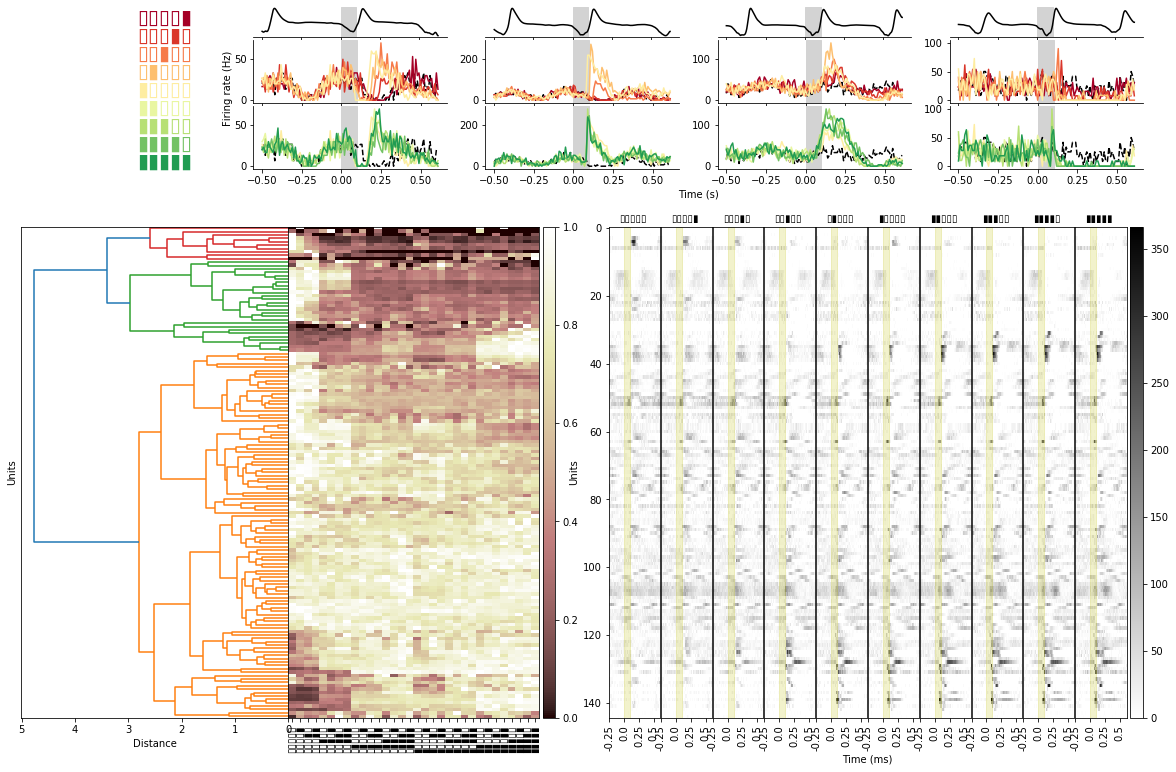

In [18]:

fig = plt.figure(figsize=(8.3, 11.7))
gs = GridSpec(9, 5, figure=fig, hspace=1.1, left=0.03, right=0.97, bottom=0.1, top=0.99)
mouse_ax = fig.add_subplot(gs[:2, :2])
mouse_ax.set_xticks([])
mouse_ax.set_yticks([])
blip_ax = fig.add_subplot(gs[:2, 2:4])
for i in range(32):
    blip_ax.text(int(i/8)+0.1, 8-i%8-0.5, glyphs[i], fontsize=11)
blip_ax.set_xlim(0, 4)
blip_ax.set_ylim(0, 8)
blip_ax.axis('off')

odour_ax1 = fig.add_subplot(gs[:2, 4])
odour_ax2 = fig.add_subplot(gs[2:4, 4:15], sharex=odour_ax1, sharey=odour_ax1)
odour_ax3 = fig.add_subplot(gs[4:6, 12:15], sharex=odour_ax1, sharey=odour_ax1)
plt.setp(odour_ax1.get_xticklabels(), visible=False)
plt.setp(odour_ax2.get_xticklabels(), visible=False)
odour_ax1 = plot_pid_and_flow(3, odour_ax1)
odour_ax2 = plot_pid_and_flow(21, odour_ax2)
odour_ax3 = plot_pid_and_flow(31, odour_ax3)
sorted_args = np.argsort(np.argmax(mean_usrt1[:, select_trials[::-1][-1]], axis=-1))


stim_ax = fig.add_subplot(gs[:2, 0])
#stimuli_plot(stim_ax, plots_all)
stimuli_plot_glyphs(stim_ax, glyphs, select_trials)
xs = np.arange(-.5, .62, 1/100)[:-1]
plot_psth(fig, gs[:2, 1], units_usrt1, select_trials, sorted_args[-38], xs, resp=filt_snips[0])
plot_psth(fig, gs[:2, 2], units_usrt1, select_trials, 42, xs, resp=filt_snips[1])
plot_psth(fig, gs[:2, 3], units_usrt1, select_trials, sorted_args[99], xs, resp=filt_snips[2])
plot_psth(fig, gs[:2, 4], units_usrt1, select_trials, sorted_args[5], xs, resp=filt_snips[3])
psth_ax = fig.add_subplot(gs[:2, 1:], frameon=False)
psth_ax.set_xticks([])
psth_ax.set_yticks([])
psth_ax.set_ylabel('Firing rate (Hz)', labelpad=20)
psth_ax.set_xlabel('Time (s)', labelpad=20)
dendo_and_heatmaps(fig, gs[2:, :], link, summed_response1)
plt.autoscale(tight=True)
#plt.savefig('221109_neural_responses.pdf')

In [237]:
### Distance matrix
dm1 = distance_matrix(mean_usrt1[:, :, 50:100].mean(axis=-1).T,mean_usrt1[:, :, 50:100].mean(axis=-1).T)
dm2 = distance_matrix(mean_usrt2[:, :, 50:100].mean(axis=-1).T,mean_usrt2[:, :, 50:100].mean(axis=-1).T) 
dm3 = distance_matrix(mean_usrt3[:, :, 50:100].mean(axis=-1).T,mean_usrt3[:, :, 50:100].mean(axis=-1).T) 

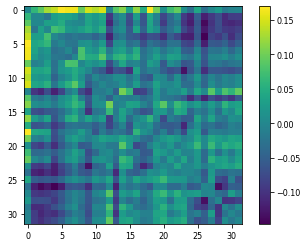

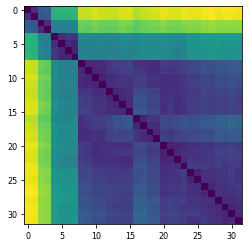

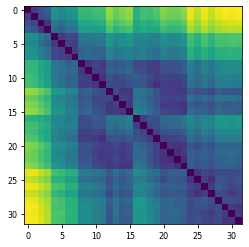

In [242]:
plt.imshow(dm1/np.max(dm1) - dm3/np.max(dm3))
plt.colorbar()
plt.figure()
plt.imshow(dm2/np.max(dm2))
plt.figure()
plt.imshow(dm3/np.max(dm3))

In [243]:
res1 = np.load('../Fig2/221026_de_1d_res_odour1_extended.npy')
res2 = np.load('../Fig2/221027_de_1d_res_odour2_extended.npy')
res3 = np.load('../Fig2/221027_de_1d_res_odour3_extended.npy')
res1 = np.array(res1).reshape(50, 162, 32)
res2 = np.array(res2).reshape(50, 162, 32)
res3 = np.array(res3).reshape(50, 162, 32)

In [244]:
def de_minimisation(coords, true_distances):
    coords = coords[:, np.newaxis]
    #print(coords)

    dm = distance_matrix(coords, coords)
#     dm_off = np.triu(dm, 1)

    loss = np.sum(np.abs(true_distances.ravel() - dm.ravel()))
    return loss

def de_minimisation_across(coords, true_distances, prev_coords, alpha):
    coords = coords[:, np.newaxis]
    
    dm = distance_matrix(coords, coords)
    coords_normed = coords - coords.mean()
    if np.sum((coords - prev_coords)**2) > np.sum((coords + prev_coords)**2):
        coords_diff = np.sum((coords + prev_coords)**2)
    else:
        coords_diff = np.sum((coords - prev_coords)**2)
    loss = np.sum((true_distances.ravel() - dm.ravel())**2) + alpha*coords_diff #+ np.mean(coords)
    return loss

def dask_de_minimisation(true_distances):
    bounds = [[0, 1000]]*32
    de = scipy.optimize.differential_evolution(de_minimisation, bounds=bounds, args=[true_distances], popsize=50, tol=0.001, maxiter=10000, )
    coords = de.x
    coords = coords - coords.mean()
    return coords

def flip_distances(distances):
    distances_normed = distances - np.mean(distances, axis=1)[:, np.newaxis]
    distances_flipped = [distances_normed[0]]
    for i in range(1, len(distances)):
        prev_distance = distances_flipped[-1]
        distance = distances_normed[i]
        if np.sum(abs(distance - prev_distance )) < np.sum(abs(distance + prev_distance)):
            distances_flipped.append(distance)
        else:
            distances_flipped.append(-distance)
    return distances_flipped

def flip_flip_distances(distances):
    flipped_distances = np.array([flip_distances(i) for i in distances])
    flipped_flipped_distances = [flipped_distances[0]]

    for i in range(1, len(flipped_distances)):
        if np.sum(np.abs(flipped_distances[0]+flipped_distances[i])) > np.sum(np.abs(flipped_distances[0]-flipped_distances[i])):
            flipped_flipped_distances.append(flipped_distances[i])
        else:
            flipped_flipped_distances.append(-flipped_distances[i])
    return np.array(flipped_flipped_distances)

In [245]:
flipped_flipped_distances1 = flip_flip_distances(res1)
flipped_flipped_distances2 = flip_flip_distances(res2)
flipped_flipped_distances3 = flip_flip_distances(res3)

In [246]:
closests1 = [flipped_flipped_distances1[0, 0]]
closests2 = [flipped_flipped_distances2[0, 0]]
closests3 = [flipped_flipped_distances3[0, 0]]
for i in range(1, 162):
    prev_distance = closests1[-1]
    diffs = np.mean(np.abs(flipped_flipped_distances1[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests1.append(flipped_flipped_distances1[min_diff, i])
    
    prev_distance = closests2[-1]
    diffs = np.mean(np.abs(flipped_flipped_distances2[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests2.append(flipped_flipped_distances2[min_diff, i])
    
    prev_distance = closests3[-1]
    diffs = np.mean(np.abs(flipped_flipped_distances3[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests3.append(flipped_flipped_distances3[min_diff, i])

# for i in np.array(closests).T:
#     plt.plot(i)

In [360]:
def plot_1d_distance_graph(xs, distances, ax, colors=None):
    distances = np.array(distances)
    trial_len = distances.shape[1]
    if colors is None:
        colors = [matplotlib.cm.plasma(i/trial_len) for i in range(trial_len)]

    print(len(colors))
    for index, i in enumerate(distances.T):
        ax.plot(xs, i, color=colors[index])
    ax.axvspan(0, 0.1, color='lightgray')
    
def distance_plots(fig, gs_base, xs, closests):

    sub_gridspec = gs_base.subgridspec(ncols=16, nrows=2, wspace=0.5, hspace=0.4)
    big_ax = fig.add_subplot(sub_gridspec[0, :-1])
    small_ax1 = fig.add_subplot(sub_gridspec[1, :5])
    small_ax2 = fig.add_subplot(sub_gridspec[1, 5:10])
    small_ax3 = fig.add_subplot(sub_gridspec[1, 10:-1])
    
    small_ax2.set_yticklabels([])
    small_ax3.set_yticklabels([])
    plot_1d_distance_graph(xs, closests1, big_ax)

    cbar_ax = fig.add_subplot(sub_gridspec[:, -1])
    #cbar_ax.yaxis.set_ticks_position('left')
    plot_cbar_and_glyphs(cbar_ax, glyphs)
    #cbar_ax.yaxis.set_ticks_position('left')
    plot_1d_distance_graph(xs[50:70], closests1[50:70], small_ax1)
    plot_1d_distance_graph(xs[50:70], closests2[50:70], small_ax2)
    plot_1d_distance_graph(xs[50:70], closests3[50:70], small_ax3)
    
    min_max = np.max(np.abs(np.concatenate([small_ax1.get_ylim(), small_ax2.get_ylim(), small_ax3.get_ylim()])))
    small_ax1.set_ylim(-min_max, min_max)
    small_ax2.set_ylim(-min_max, min_max)
    small_ax3.set_ylim(-min_max, min_max)
    label_ax = fig.add_subplot(sub_gridspec[:, :-1], frameon=False)
    label_ax.set_xticks([])
    label_ax.set_yticks([])
    label_ax.set_ylabel('Distance (Hz)', labelpad=30)
    label_ax.set_xlabel('Time (s)', labelpad=20)
    for i in range(10):
        small_ax1.axvline(0.02*i, zorder=1, color='k', linestyle='--')
        small_ax2.axvline(0.02*i, zorder=1, color='k', linestyle='--')
        small_ax3.axvline(0.02*i, zorder=1, color='k', linestyle='--')
    return big_ax, small_ax1, small_ax2, small_ax3
def plot_cbar_and_glyphs(ax, glyphs, cmap='plasma_r'):
    im = ax.imshow(np.array([[0, 1]]), aspect=30, cmap=cmap)
    cbar = plt.colorbar(cax=ax, mappable=im)
    cbar.set_ticks(np.linspace(0, 1, len(glyphs)))
    cbar.set_ticklabels(glyphs[::-1])

32
32
32
32


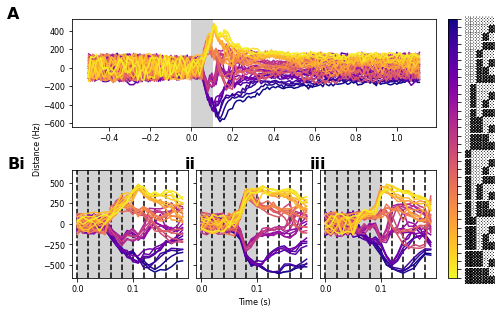

In [362]:
fig = plt.figure(figsize=(6, 4))
gs = GridSpec(1, 1, left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, )
xs = np.arange(-.5, 1.12, 1/100)

axs = distance_plots(fig, gs[0], xs, [closests1, closests2, closests3])
label_axes.label_axes(axs, ['A', 'Bi', 'ii', 'iii'], fontsize=16, fontweight='bold', x=[-0.1, -0.1, 0.31, 0.6], y=[0.95, 0.43, 0.43, 0.43])
plt.savefig('../../Thesis/Corrections/230209_distance_embedding.pdf', bbox_inches='tight')